In [1]:
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams["figure.figsize"] = (30,10)

In [2]:
data = pd.read_csv("weather_data.csv")
data.head()

,LAT,LON,YEAR,MO,DY,T2M_MAX,T2M_MIN,T2M
0,40.99041,35.75761,2010,1,1,11.84,-0.24,6.13
1,40.99041,35.75761,2010,1,2,13.78,3.74,7.89
2,40.99041,35.75761,2010,1,3,6.90,1.20,3.35
3,40.99041,35.75761,2010,1,4,2.67,-4.31,-0.11
4,40.99041,35.75761,2010,1,5,3.17,-4.42,-1.90


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LAT,1827.0,40.990410,0.000000,40.99041,40.99041,40.99041,40.99041,40.99041
LON,1827.0,35.757610,0.000000,35.75761,35.75761,35.75761,35.75761,35.75761
YEAR,1827.0,2012.001642,1.415567,2010.00000,2011.00000,2012.00000,2013.00000,2015.00000
MO,1827.0,6.520525,3.450954,1.00000,4.00000,7.00000,10.00000,12.00000
DY,1827.0,15.719759,8.806068,1.00000,8.00000,16.00000,23.00000,31.00000
T2M_MAX,1827.0,17.831286,9.579773,-6.12000,9.89000,18.28000,25.90500,38.76000
T2M_MIN,1827.0,6.093716,7.246317,-16.56000,0.03500,6.60000,12.41500,20.67000
T2M,1827.0,11.299414,8.300437,-12.35000,4.41000,11.80000,18.58500,28.40000


In [4]:
data.isnull().any()

LAT        False
LON        False
YEAR       False
MO         False
DY         False
T2M_MAX    False
T2M_MIN    False
T2M        False
dtype: bool

In [5]:
##

In [6]:
cols = ["YEAR", "MO", "DY"]
data["DATE"] = data[cols].apply(lambda row: "-".join(row.values.astype(str)), axis=1)

data.set_index("DATE", inplace = True)
useless = ["LAT", "LON", "YEAR", "MO", "DY"]
df = data.drop(useless, axis = 1)
df.head()

,T2M_MAX,T2M_MIN,T2M
DATE,,,
2010-1-1,11.84,-0.24,6.13
2010-1-2,13.78,3.74,7.89
2010-1-3,6.90,1.20,3.35
2010-1-4,2.67,-4.31,-0.11
2010-1-5,3.17,-4.42,-1.90


<AxesSubplot:xlabel='DATE'>

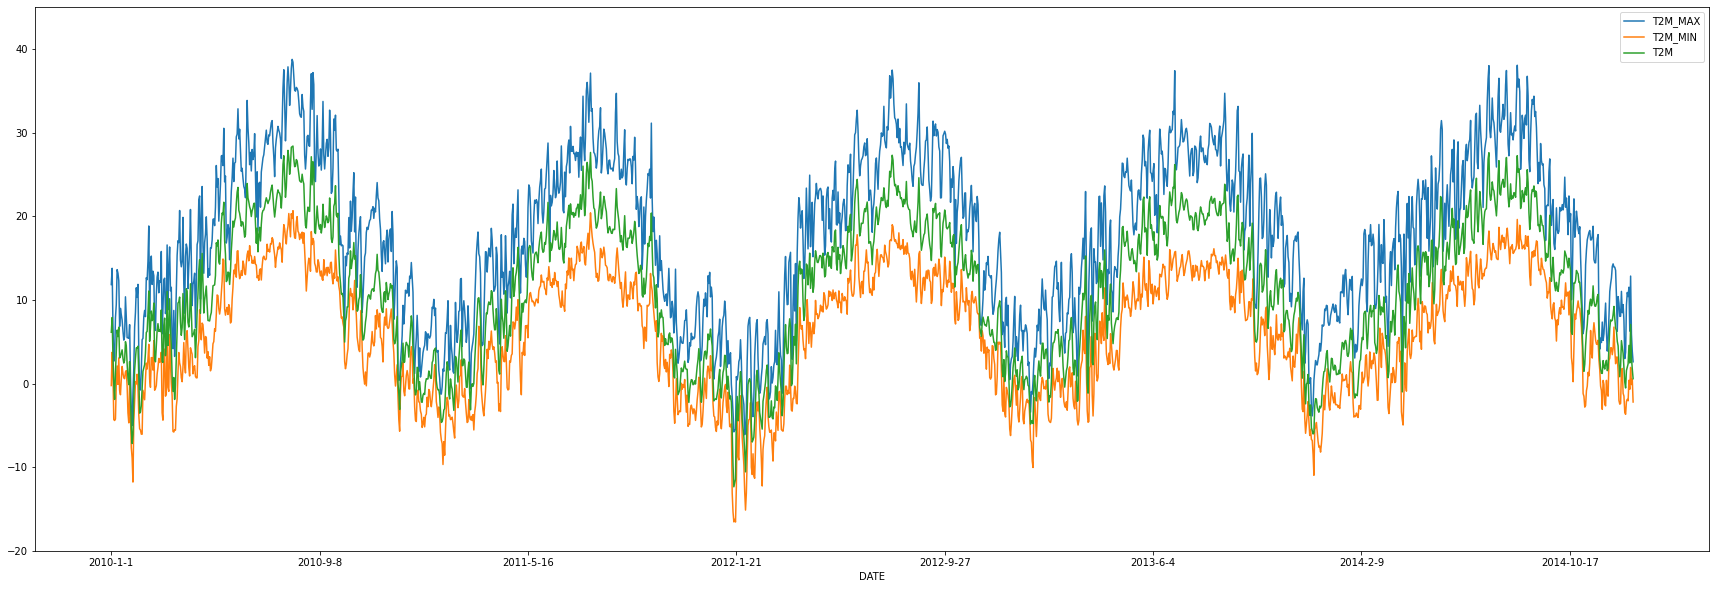

In [7]:
df.plot(ylim = [-20,45])

In [8]:
##

<function matplotlib.pyplot.show(close=None, block=None)>

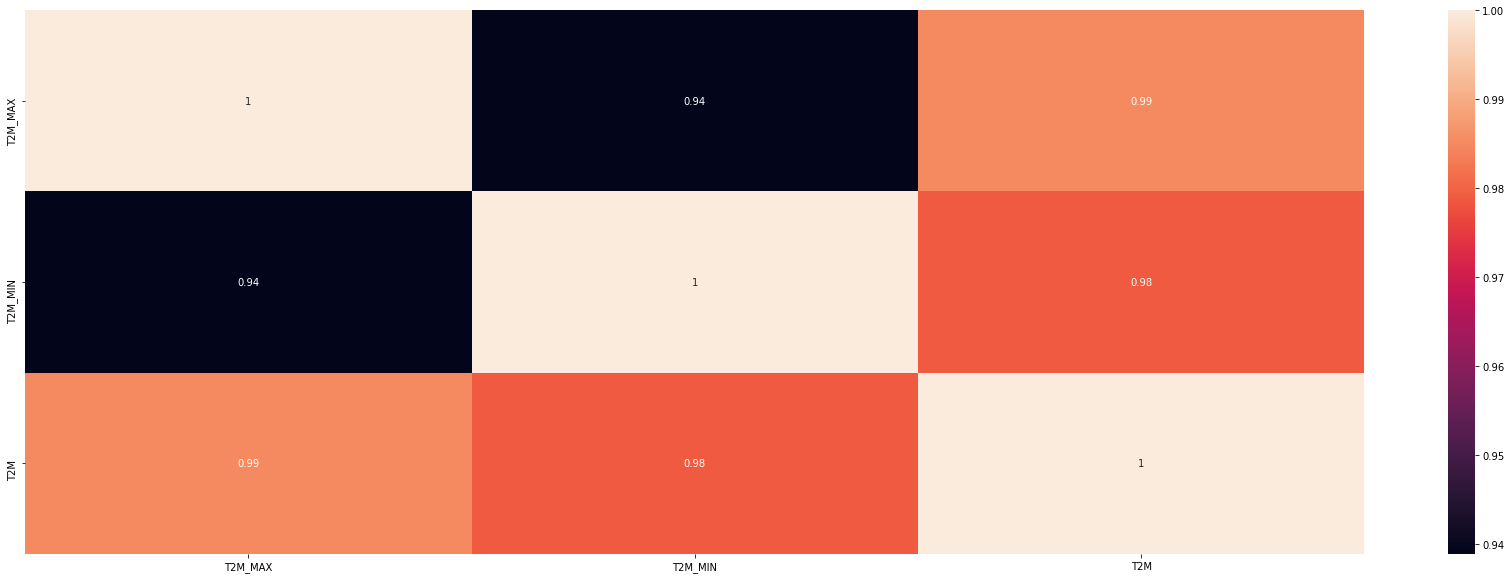

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show